In [2]:
import numpy as np 
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [3]:
spam = pd.read_csv('/content/drive/MyDrive/spam_mail_data.csv')

In [4]:
spam.head() #first 5 rows of the data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


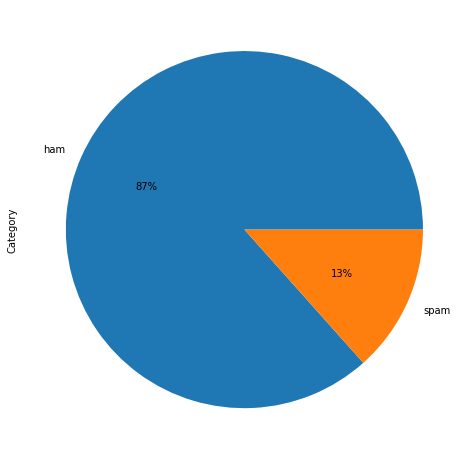

In [7]:
plt.rcParams["figure.figsize"] = [8,10]
spam.Category.value_counts().plot(kind='pie', autopct='%1.0f%%')#13% of the messages are spam and the rest are not spam

In [8]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [9]:
spam['Category'].replace(['spam', 'ham'],      
                        [1, 0], inplace=True)#converting the words spam and ham to 1 and 0 in order for model to be able to train and fit model

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

spam['text_without_sw'] = spam.Message.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [11]:
spam.head()

,Category,Message,text_without_sw
0,0,"Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah I think goes usf, lives around though"


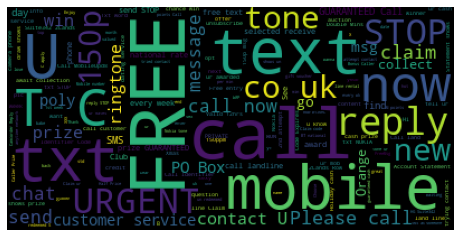

In [12]:
spam_dataset = spam[spam["Category"]== 1] #plotting word cloud for spam 

plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(spam_dataset['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

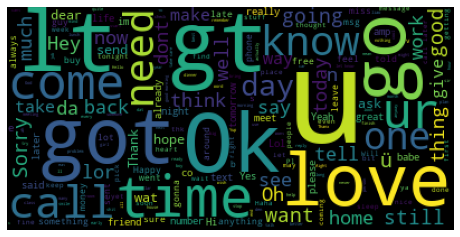

In [13]:
spam_ham = spam[spam["Category"]== 0] #plotting word cloud for not spam 

plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(spam_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [14]:
X = spam["Message"]# function that cleans a text string and returns text string clean of digits, letters and empty spaces
y = spam["Category"]

def clean_text(doc):

  document = re.sub('[^a-zA-Z]', ' ', doc)
  document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
  document = re.sub(r'\s+', ' ', document)

  return document

In [15]:
X_sentences = []#taking the spam list and not spam list and preprocesses it
reviews = list(X)
for rev in reviews:
  X_sentences.append(clean_text(rev))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer #converts the text to numerical form 

In [17]:


vectorizer = TfidfVectorizer(max_features=2500, min_df=5,
                             max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X_sentences).toarray()


In [18]:
from sklearn.model_selection import train_test_split #dividing data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [19]:
from sklearn.naive_bayes import MultinomialNB #this trains the model

spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred = spam_detector.predict(X_test) #making predictions on model

In [24]:
confusion_matrix(y_test, y_pred) #confusion matrix 

array([[967,   1],
       [ 21, 126]])



*   There were 967 True Positives - meaning the mode identified text as spam and it was spam.
*   There were 126 True Negatives, meaning the model identified text as not spam and it was not spam.

*   1 False Positive - meaning the model identified it as spam and it was not spam.
*   21 False Negative - the model identified it has not spam and it was spam.





In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report,(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

<function classification_report at 0x7ff46bdc60d0> (1078    0
4028    0
958     0
4642    0
4674    0
       ..
324     0
1163    1
86      0
4214    0
90      0
Name: Category, Length: 1115, dtype: int64, array([0, 0, 0, ..., 0, 0, 0]))
0.9802690582959641


Model shows accuracy of 98%

In [25]:
print(X_sentences[45])#randomly selected one of the texts and model indentified as not spam
print(y[45])

No calls messages missed calls
0


References: 'Python Machine Learning Workbook'